# DEMO of RME

In [1]:
# Installation - uncomment if RME is not installed
# ! pip install git+https://github.com/kobylkam/RME.git

Importing installed RME package 

In [2]:
from RME.explainer import Explainer

Importing modules for model development

In [3]:
from __future__ import print_function
import os
import os.path
import numpy as np
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.ensemble
import spacy
import sys
from sklearn.feature_extraction.text import CountVectorizer

Loading data set from ``http://www.cs.cornell.edu/people/pabo/movie-review-data/`` . 

In [4]:
# dataset from http://www.cs.cornell.edu/people/pabo/movie-review-data/
def load_polarity(path='sentiment'):
    data = []
    labels = []
    f_names = ['rt-polarity.neg', 'rt-polarity.pos']
    for (l, f) in enumerate(f_names):
        for line in open(os.path.join(path, f), 'rb'):
            try:
                line.decode('utf8')
            except:
                continue
            data.append(line.strip())
            labels.append(l)
    return data, labels

Model development

In [5]:
data, labels = load_polarity()
vectorizer = CountVectorizer(min_df=1)
vectorizer.fit(data)
train_vectors = vectorizer.transform(data)

c = sklearn.linear_model.LogisticRegression()
c.fit(train_vectors, labels)

def predict_function(texts):
    return c.predict_proba(vectorizer.transform(texts))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Creating an explainer

In [6]:
e = Explainer(data)

Explaining instance: *It is a wonderful World!*

In [7]:
e.explain_instance(['It is a wonderful World!'], predict_function = predict_function, class_index = 1)

In [8]:
e.step_by_step_prediction(instance=['It is a wonderful World!'], predict_function=predict_function)

Visualisation

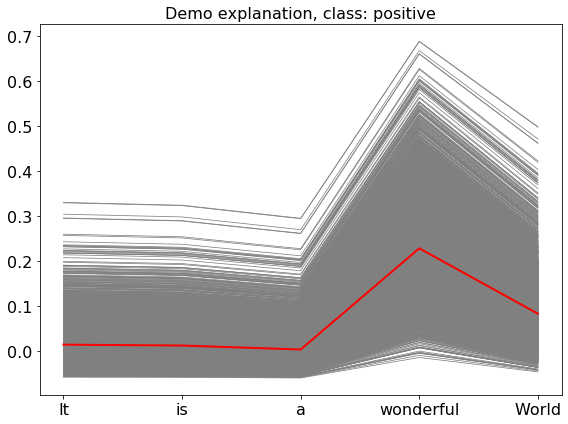

In [9]:
e.plot_local_perturbations(type='probability_change', title = 'Demo explanation, class: positive')

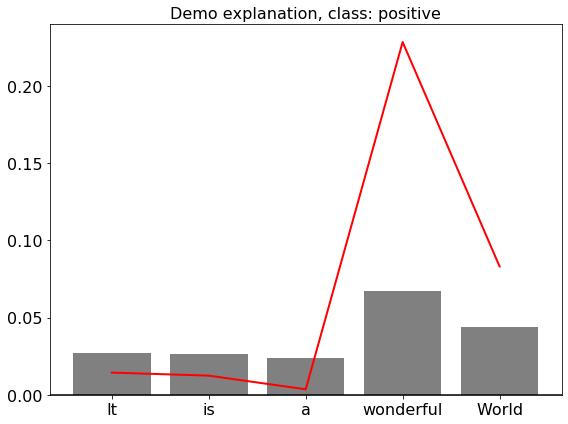

In [10]:
e.plot_local_perturbations(type='probability_change', title = 'Demo explanation, class: positive', plot_type='scores')

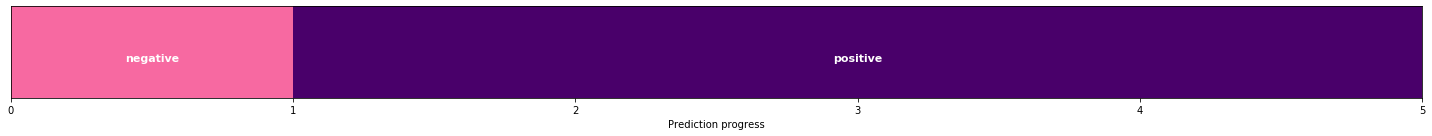

In [11]:
e.plot_partial_predictions(class_dictionary={0:'negative', 1:'positive'}, figsize=(20,2))

Explaining another instance using the same explainer

In [12]:
e.explain_instance(['It was the worst and most boring movie ever!'],predict_function=predict_function,class_index = 0)

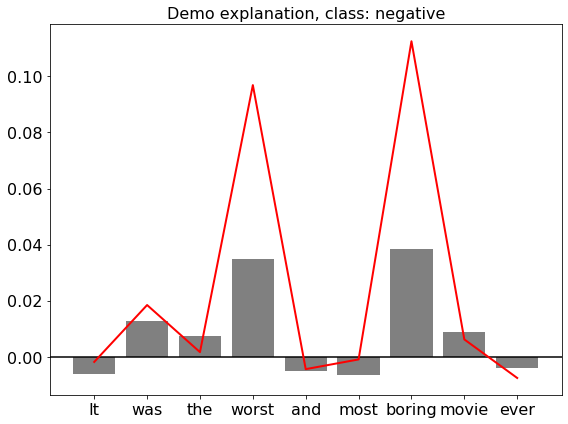

In [13]:
e.plot_local_perturbations(type='probability_change', plot_type='scores', title = 'Demo explanation, class: negative')